<a href="https://colab.research.google.com/github/SpandanJogannagari/Machine-Learning-Homeworks/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install surprise
import pandas as pd
from surprise import KNNBasic,Reader, Dataset, SVD
from surprise.model_selection import KFold, cross_validate
import numpy as np
import matplotlib.pyplot as plt

In [14]:
ratings_df = pd.read_csv("ratings_small.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [17]:
reader = Reader(line_format = 'user item rating',rating_scale = (0,5))
ratings_data = Dataset.load_from_df(ratings_df[["userId","movieId","rating"]],reader)

In [21]:
svd=SVD(biased=False)
pmf_result = cross_validate(svd, ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0090  1.0224  1.0192  1.0132  1.0154  1.0159  0.0046  
MAE (testset)     0.7766  0.7890  0.7827  0.7783  0.7829  0.7819  0.0043  
Fit time          4.92    4.93    5.04    5.01    4.77    4.93    0.09    
Test time         0.35    0.14    0.15    0.22    0.21    0.21    0.08    


In [23]:
mae_pmf = pmf_result['test_mae'].mean()
rmse_pmf = pmf_result['test_rmse'].mean()
print(f'Average MAE of 5-folds cross-validation of PMF is {mae_pmf}')
print(f'Average RMSE of 5-folds cross-validation OF PFM is {rmse_pmf}')

Average MAE of 5-folds cross-validation of PMF is 0.7819000361481797
Average RMSE of 5-folds cross-validation OF PFM is 1.0158557498899237


In [24]:
# USER-BASED -
option_user_based = {'user-based': True}
result_user = cross_validate(KNNBasic(sim_options = option_user_based), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9582  0.9703  0.9807  0.9655  0.9704  0.9690  0.0073  
MAE (testset)     0.7360  0.7464  0.7513  0.7421  0.7452  0.7442  0.0051  
Fit time          0.19    0.18    0.17    0.16    0.16    0.17    0.01    
Test time         2.05    1.79    1.90    1.85    1.79    1.87    0.09    


In [25]:
mae_user = result_user['test_mae'].mean()
rmse_user = result_user['test_rmse'].mean()
print(f'Average MAE of 5-folds cross-validation of User Based is {mae_user}')
print(f'Average RMSE of 5-folds cross-validation of User Based is {rmse_user}')

Average MAE of 5-folds cross-validation of User Based is 0.744208723901852
Average RMSE of 5-folds cross-validation of User Based is 0.9690162749204703


In [26]:
Option_item_based = {'user-based': False}
result_item = cross_validate(KNNBasic(sim_options = Option_item_based), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9672  0.9618  0.9696  0.9702  0.9717  0.9681  0.0035  
MAE (testset)     0.7441  0.7403  0.7450  0.7435  0.7474  0.7441  0.0023  
Fit time          0.13    0.17    0.23    0.17    0.27    0.20    0.05    
Test time         1.76    1.94    1.93    1.78    2.00    1.88    0.09    


In [28]:
mae_item = result_item['test_mae'].mean()
rmse_item = result_item['test_rmse'].mean()
print(f'Average MAE of 5-folds cross-validation of Item Based is {mae_item}')
print(f'Average RMSE of 5-folds cross-validation of Item Based is {rmse_item}')

Average MAE of 5-folds cross-validation of Item Based is 0.7440774899606795
Average RMSE of 5-folds cross-validation of Item Based is 0.9681016709725837


In [32]:
#MSD
user_based_MSD = {'name':'msd', 'user-based': True}
item_based_MSD = {'name':'msd', 'user-based': False}
user_MSD = cross_validate(KNNBasic(sim_options = user_based_MSD), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
item_MSD = cross_validate(KNNBasic(sim_options = item_based_MSD), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9656  0.9637  0.9692  0.9678  0.9725  0.9678  0.0030  
MAE (testset)     0.7454  0.7410  0.7434  0.7431  0.7466  0.7439  0.0019  
Fit time          0.16    0.16    0.26    0.17    0.19    0.19    0.04    
Test time         1.89    1.72    1.86    1.88    2.28    1.92    0.19    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [33]:
#COSINE
user_based_COSINE = {'name':'cosine', 'user-based': True}
item_based_COSINE = {'name':'cosine', 'user-based': False}
user_COSINE = cross_validate(KNNBasic(sim_options = user_based_COSINE), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
item_COSINE = cross_validate(KNNBasic(sim_options = item_based_COSINE), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9846  0.9968  1.0011  0.9869  1.0013  0.9941  0.0071  
MAE (testset)     0.7611  0.7701  0.7739  0.7622  0.7719  0.7679  0.0052  
Fit time          0.50    0.54    0.50    0.48    0.52    0.51    0.02    
Test time         1.90    2.02    2.07    1.92    1.95    1.97    0.06    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

In [34]:
#PEARSON
user_based_PEARSON = {'name':'pearson_baseline', 'user-based': True}
item_based_PEARSON = {'name':'pearson_baseline', 'user-based': False}
user_PEARSON = cross_validate(KNNBasic(sim_options = user_based_PEARSON), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
item_PEARSON = cross_validate(KNNBasic(sim_options = item_based_PEARSON), ratings_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9955  0.9846  0.9958  1.0031  1.0021  0.9962  0.0066  
MAE (testset)     0.7697  0.7604  0.7677  0.7737  0.7748  0.7693  0.0051  
Fit time          0.82    0.83    0.82    0.81    0.86    0.83    0.02    
Test time         1.81    1.81    1.65    1.89    2.10  

In [35]:
avg_mae_user_msd = user_MSD['test_mae'].mean()
avg_rmse_user_msd = user_MSD['test_rmse'].mean()
avg_mae_item_msd = item_MSD['test_mae'].mean()
avg_rmse_item_msd = item_MSD['test_rmse'].mean()
avg_mae_user_cosine = user_COSINE['test_mae'].mean()
avg_rmse_user_cosine = user_COSINE['test_rmse'].mean()
avg_mae_item_cosine = item_COSINE['test_mae'].mean()
avg_rmse_item_cosine = item_COSINE['test_rmse'].mean()
avg_mae_user_pearson = user_PEARSON['test_mae'].mean()
avg_rmse_user_pearson = user_PEARSON['test_rmse'].mean()
avg_mae_item_pearson = item_PEARSON['test_mae'].mean()
avg_rmse_item_pearson = item_PEARSON['test_rmse'].mean()

In [37]:
comp = {
    'mae': {
      'cosine': [avg_mae_user_cosine, avg_mae_item_cosine ],
      'msd': [avg_mae_user_msd, avg_mae_item_msd],
      'pearson': [avg_mae_user_pearson, avg_mae_item_pearson]
    },
    'rmse': {
      'cosine': [avg_rmse_user_cosine, avg_rmse_item_cosine ],
      'msd': [avg_rmse_user_msd, avg_rmse_item_msd],
      'pearson': [avg_rmse_user_pearson, avg_rmse_item_pearson]
    }
}

lables = ['USER-BASED', 'ITEM-BASED']

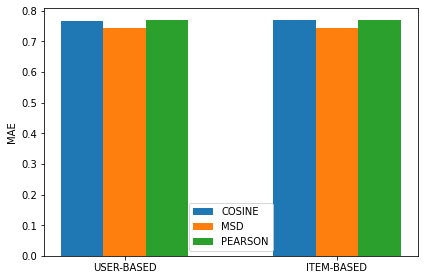

In [41]:
x = np.arange(len(lables)) 
width = 0.2

plt.bar(x-width, comp['mae']['cosine'], width)
plt.bar(x, comp['mae']['msd'], width)
plt.bar(x+width, comp['mae']['pearson'], width)
plt.xticks(x, lables)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["COSINE", "MSD", "PEARSON"])
plt.tight_layout()
plt.show()


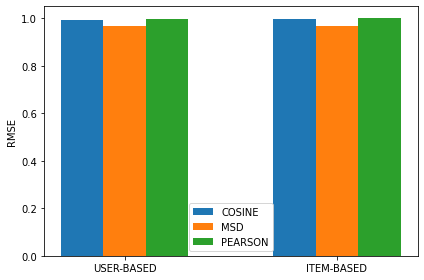

In [42]:
x = np.arange(len(lables)) 
width = 0.2

plt.bar(x-width, comp['rmse']['cosine'], width)
plt.bar(x, comp['rmse']['msd'], width)
plt.bar(x+width, comp['rmse']['pearson'], width)
plt.xticks(x, lables)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["COSINE", "MSD", "PEARSON"])
plt.tight_layout()
plt.show()


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0623  1.0482  1.0603  1.0574  1.0620  1.0581  0.0052  
MAE (testset)     0.8528  0.8425  0.8513  0.8490  0.8535  0.8498  0.0040  
Fit time          0.15    0.17    0.19    0.18    0.20    0.18    0.02    
Test time         0.82    0.93    0.80    0.81    0.95    0.86    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

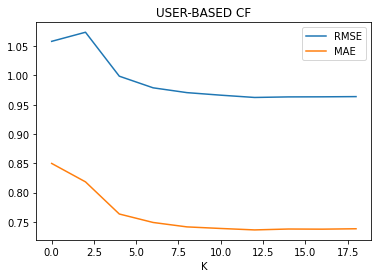

In [57]:
x_user = []
rmse_user = []
mae_user = []
mean_min_user=10000
for i in range(0, 20, 2):
    knn_ucf = KNNBasic(sim_options={'user_based': True}, k=i)
    result_user = cross_validate(knn_ucf,ratings_data , measures=['RMSE', 'MAE'], cv=5, verbose=True)
    x_user.append(i)
    rmse_user.append(result_user["test_rmse"].mean())
    mae_user.append(result_user["test_mae"].mean())
    curr_mean_user = result_user['test_rmse'].mean()
    if  curr_mean_user < mean_min_user:
      mean_min_user = curr_mean_user
      min_k_user = i
  
fig, p = plt.subplots()
p.plot(x_user, rmse_user, label="RMSE")
p.plot(x_user, mae_user, label="MAE")
p.set_xlabel("K")
p.legend()
plt.title("USER-BASED CF")
plt.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0569  1.0624  1.0552  1.0594  1.0564  1.0581  0.0025  
MAE (testset)     0.8482  0.8544  0.8480  0.8513  0.8471  0.8498  0.0027  
Fit time          4.34    4.28    4.60    4.44    4.20    4.37    0.14    
Test time         5.04    5.04    5.07    5.12    4.96    5.04    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

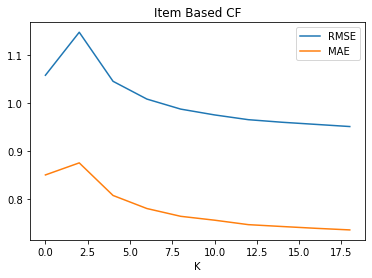

In [58]:
x_item = []
rmse_item = []
mae_item = []
mean_min_item=10000
for i in range(0, 20, 2):
    knn_Icf = KNNBasic(sim_options={'user_based': False}, k=i)
    result_item = cross_validate(knn_Icf,ratings_data , measures=['RMSE', 'MAE'], cv=5, verbose=True)
    x_item.append(i)
    rmse_item.append(result_item["test_rmse"].mean())
    mae_item.append(result_item["test_mae"].mean())
    curr_mean_item = result_item['test_rmse'].mean()
    if  curr_mean_item < mean_min_item:
      mean_min_item = curr_mean_item
      min_k_item = i
   
fig, p = plt.subplots()
p.plot(x_item, rmse_item, label="RMSE")
p.plot(x_item, mae_item, label="MAE")
p.set_xlabel("K")
p.legend()
plt.title("Item Based CF")
plt.show()

In [63]:
print(f'The k value for  minimum mean of RMSE for user based filter is {min_k_user}')
print(f'The k value for  minimum mean of RMSE for item based filter is {min_k_item}')

The k value for  minimum mean of RMSE for user based filter is 12
The k value for  minimum mean of RMSE for item based filter is 18
